# Import Packages dan Dataset

In [3]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Connect Gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Ganti dengan path lengkap ke file CSV Anda di Google Drive
file_path = '/content/drive/My Drive/Final_Project_DS46/marketing_campaign.csv'

# Membaca CSV
df = pd.read_csv(file_path,sep=";")

In [6]:
# Cek data
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [7]:
# Cek data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Intepretasi
 Dt Customer memiliki Dtype Object. Seharusnya diubah menjadi datetime.

In [8]:
# Mengubah kolom Dt_Customer menjadi dtype datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# 1. Analisa Deskriptif

In [9]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   

                         Dt_Customer      Recency     MntWines    MntFruits  \
count                           2240  2240.000000  2240.000000  2240.000000   
mean   2013-07-10 10:01:42.857142784    49.109375   303.935714    26.302232   
min              2012-07-30 00:00:00     0.000000     0.000000     0.000000   
25%              2013-01-16 00:00:00    24.000000    23.750000     1.000000   
50%              2013-07-08 12:00:00    49.000000   173.500000     8.000000   
75%              2013-12-30 06:00:00    74.000000   504.250000    33.000000   
max              2014-06-29 00:00:00    99.000000  1493.000000   199.000000   
std                              NaN    28.962453   336.597393    39.773434   

       MntMeatProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean        166.950000  ...           5.316518      0.072768      0.074554   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%          16.000000  ...           3.000000      0.000000      0.000000   
50%          67.000000  ...           6.000000      0.000000      0.000000   
75%         232.000000  ...           7.000000      0.000000      0.000000   
max        1725.000000  ...          20.000000      1.000000      1.000000   
std         225.715373  ...           2.426645      0.259813      0.262728   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  
std          0.0     0.356274  

[8 rows x 27 columns]

In [10]:
# Membagi data numerik dan kategorik
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include=['object'])

## Menghitung Missing Value

In [11]:
# Menghitung Jumlah missing value tiap fitur
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### Intepretasi
terdapat 24 data missing pada kolom Income selajutnya missing data sebaiknya dihapus saja.

## Identifikasi Data Duplicates

In [12]:
# Cek apakah ada data duplikat
df.duplicated().any()

False

### Intepretasi

Tidak ada data duplicate dalam data set sehingga proses data cleansing dapat langsung dilanjutkan

# 2. Analisa Univariat

## Identifikasi Data Outliers

In [13]:
# List nama kolom numerik
nums = list(df_num.columns)

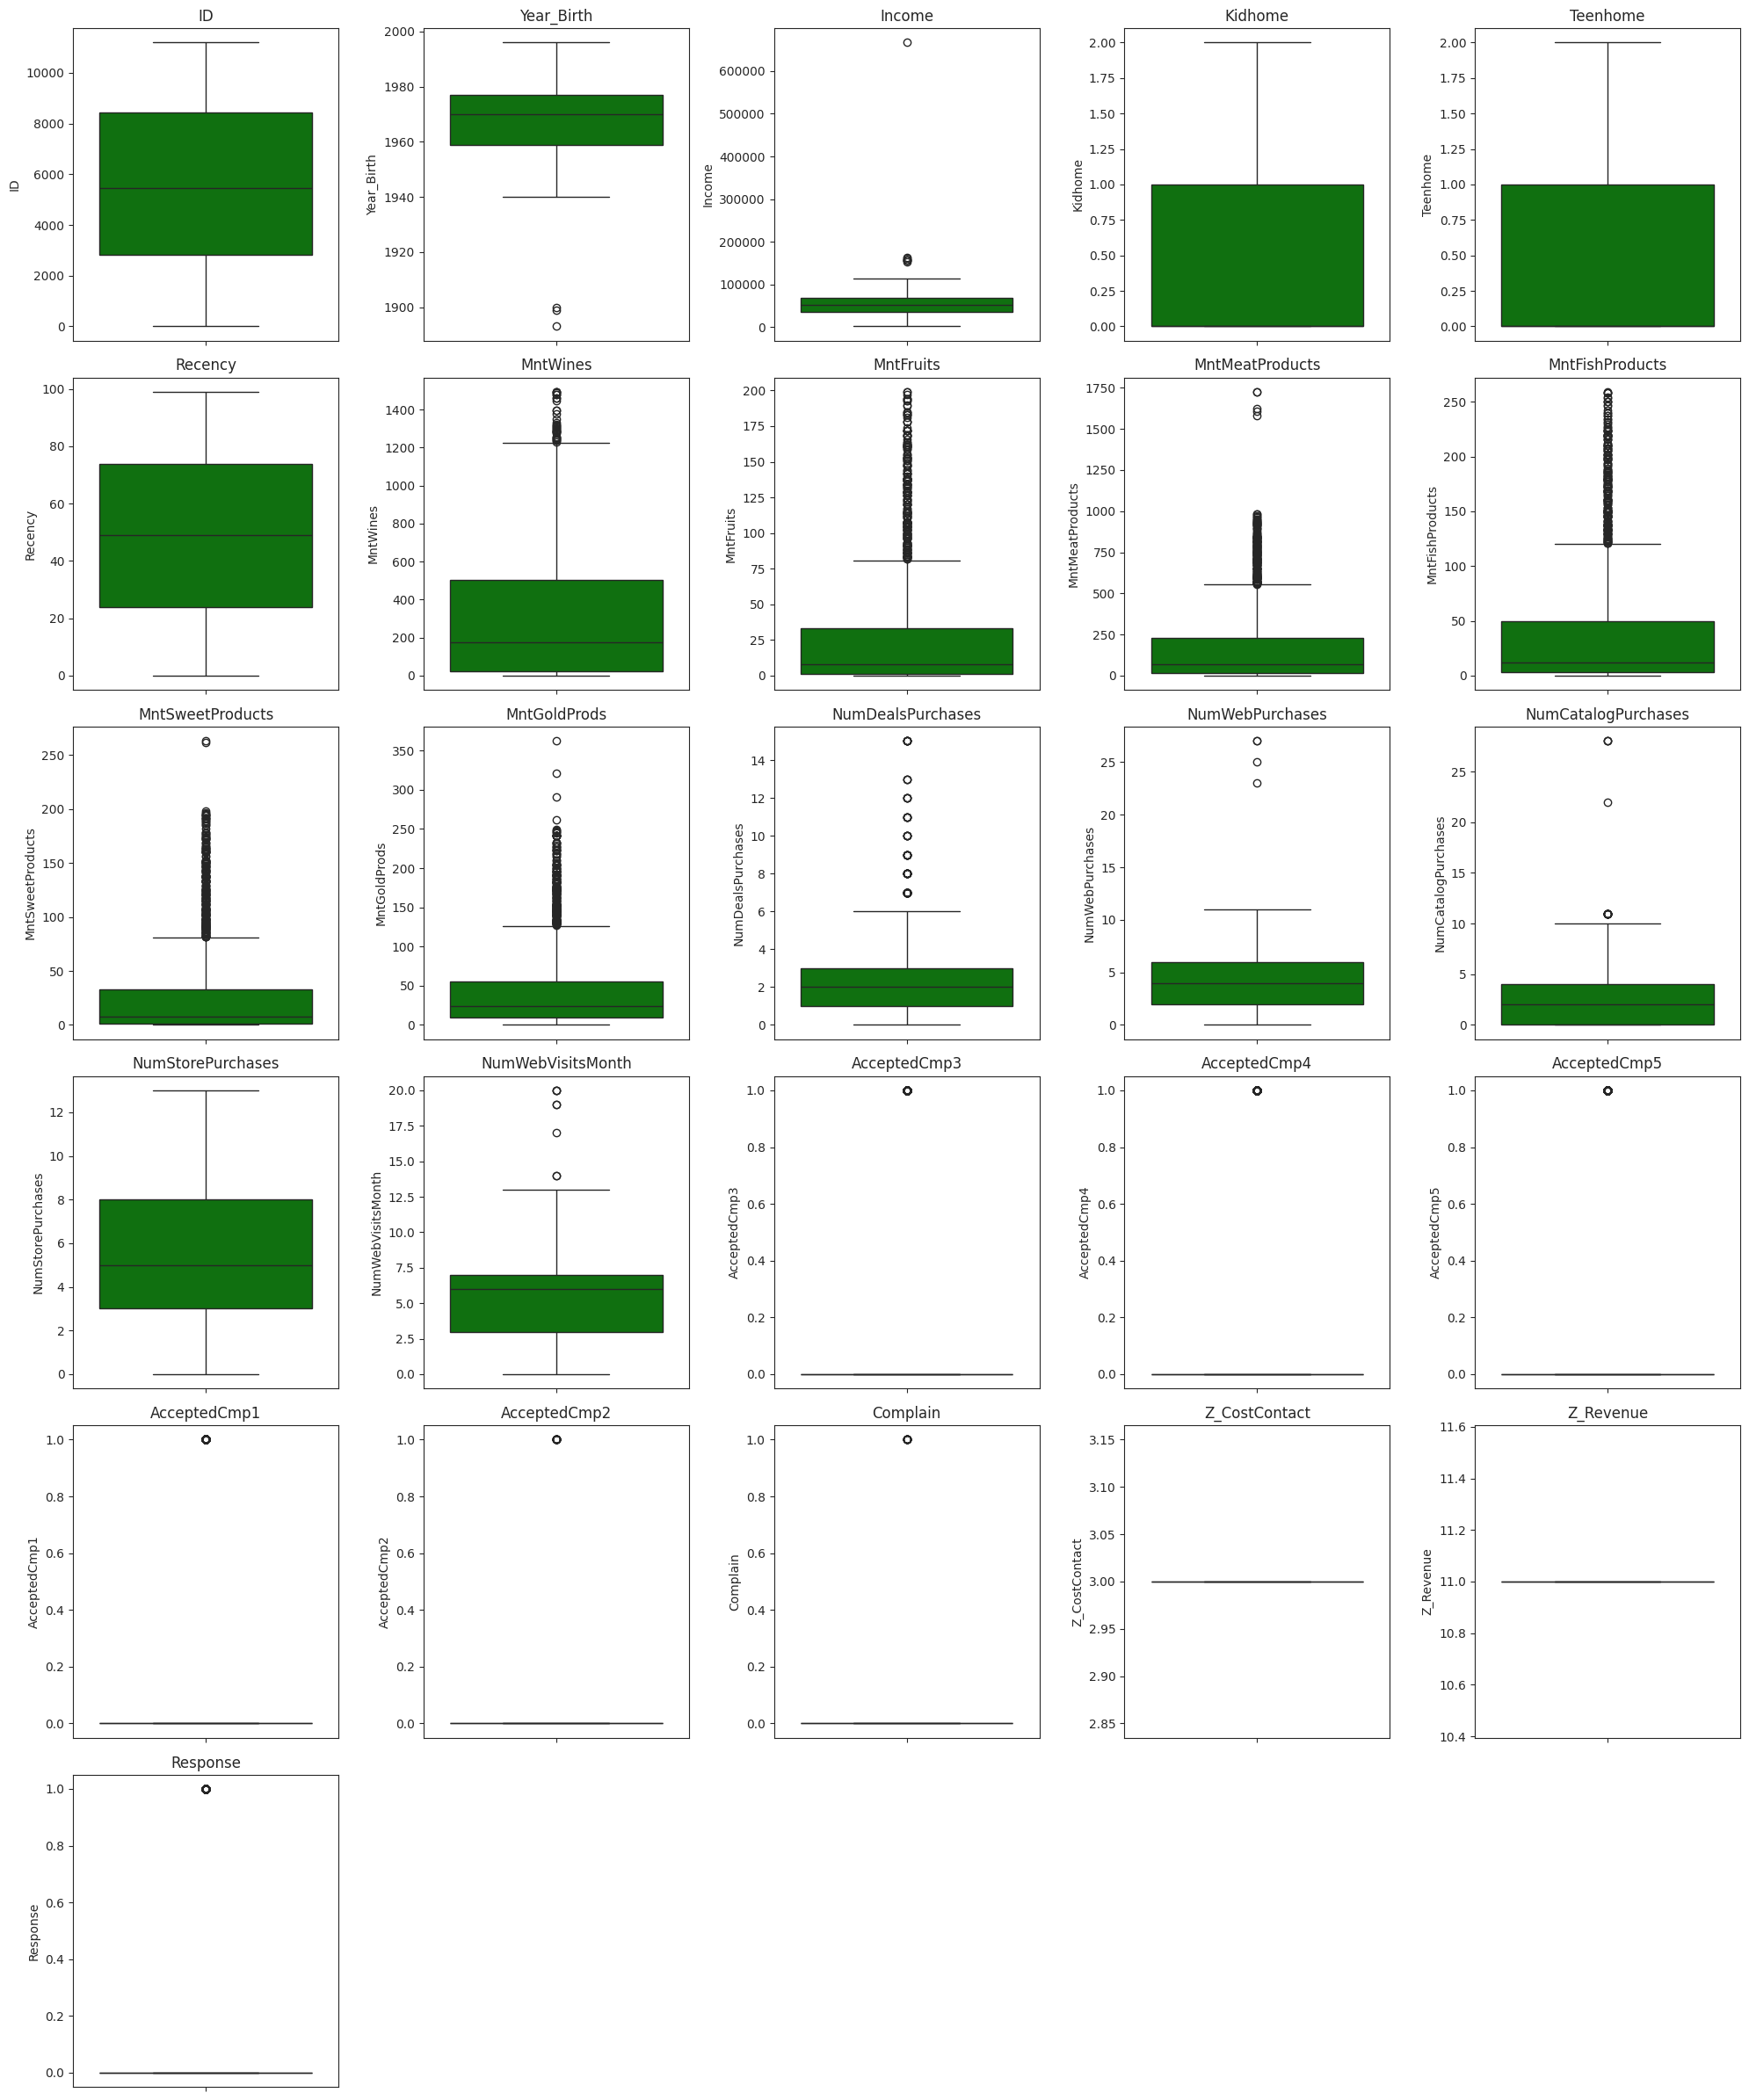

In [47]:
# Ukuran subplot
n_cols = 5
n_rows = (len(nums) + n_cols - 1) // n_cols  # Pembulatan ke atas untuk memastikan semua kolom ditampilkan

# Membuat figure dengan ukuran yang lebih besar
plt.figure(figsize=(20, 4 * n_rows))

for i, column in enumerate(nums):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(y=df[column], color='green', orient='v')
    plt.title(column)  # Menambahkan judul untuk masing-masing boxplot
    plt.tight_layout(pad=3.0)  # Mengatur jarak antar subplot

# Menampilkan grafik
plt.tight_layout()  # Mengatur layout agar tidak tumpang tindih
plt.savefig("boxplot_graph.png", dpi=300)

Terlihat dari grafik boxplot terdapat banyak Outlier pada berbagai kolom. Outlier harus ditangani sebelum masuk tahapan pemrosesasn data. Pada tahap preprocessing selanjutnya Outlier dapat ditangani dengan metode IQR dan z-test.

## Distribusi Data Fitur

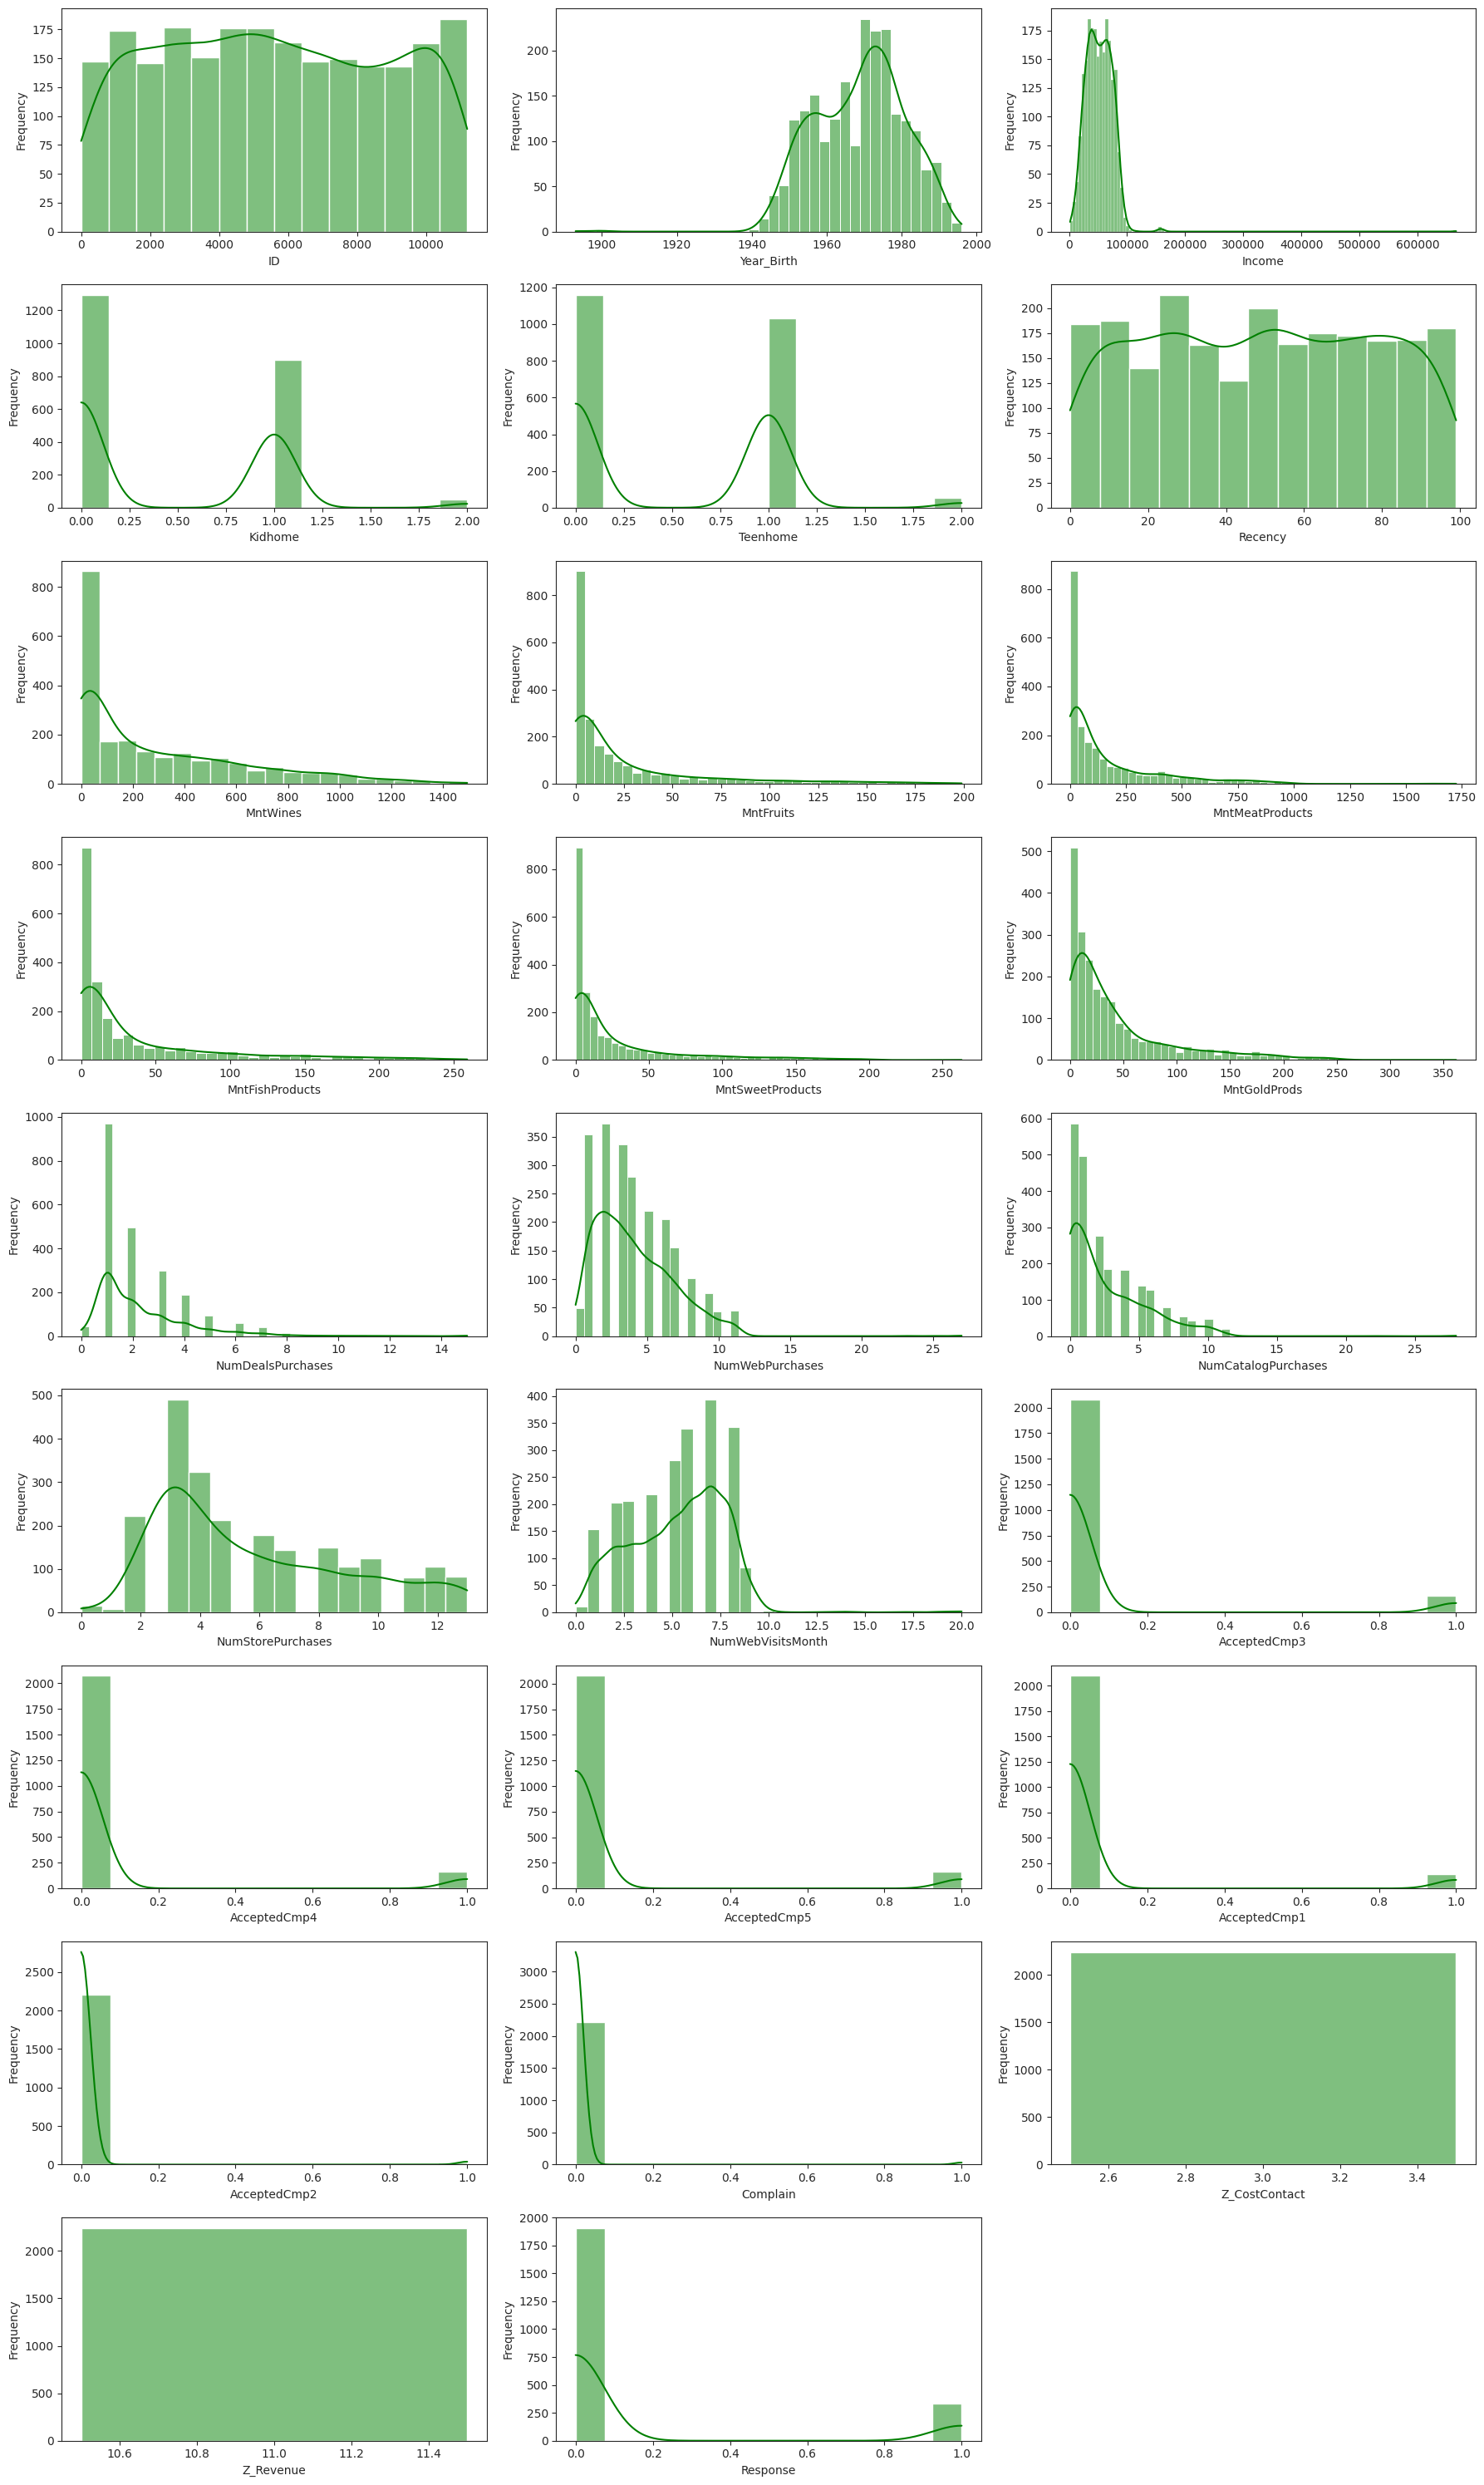

In [55]:
# Set style
sns.set_style("ticks")

# Menyiapkan figur dengan ukuran yang lebih besar untuk memastikan kejelasan
plt.figure(figsize=(18, 30))  # Adjust the size based on your dataset and the number of subplots

# Create a subplot for each numerical feature
for i, col in enumerate(nums):
    plt.subplot(9, 3, i+1)  # 9x3 layout is suitable for up to 27 subplots
    sns.histplot(x=df[col], color='green', kde=True)  # Adding Kernel Density Estimate (KDE)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()  # Mengatur layout agar tidak tumpang tindih
plt.savefig("hist_graph.png", dpi=300)

Terlihat dari grafik di atas terdapat banyak kolom yang memiliki distribusi positive skewed. Sebelum data diproses data sebaiknya diubah kedalam bentuk normal untuk memudahkan dalam tahapan machine learning. pada tahapan pre-processing sebaiknya data dengan deistribusi positive skewed ditransform dengan metode log transform.

# 3. Analisis Multivariat

## Heapmap Correlation

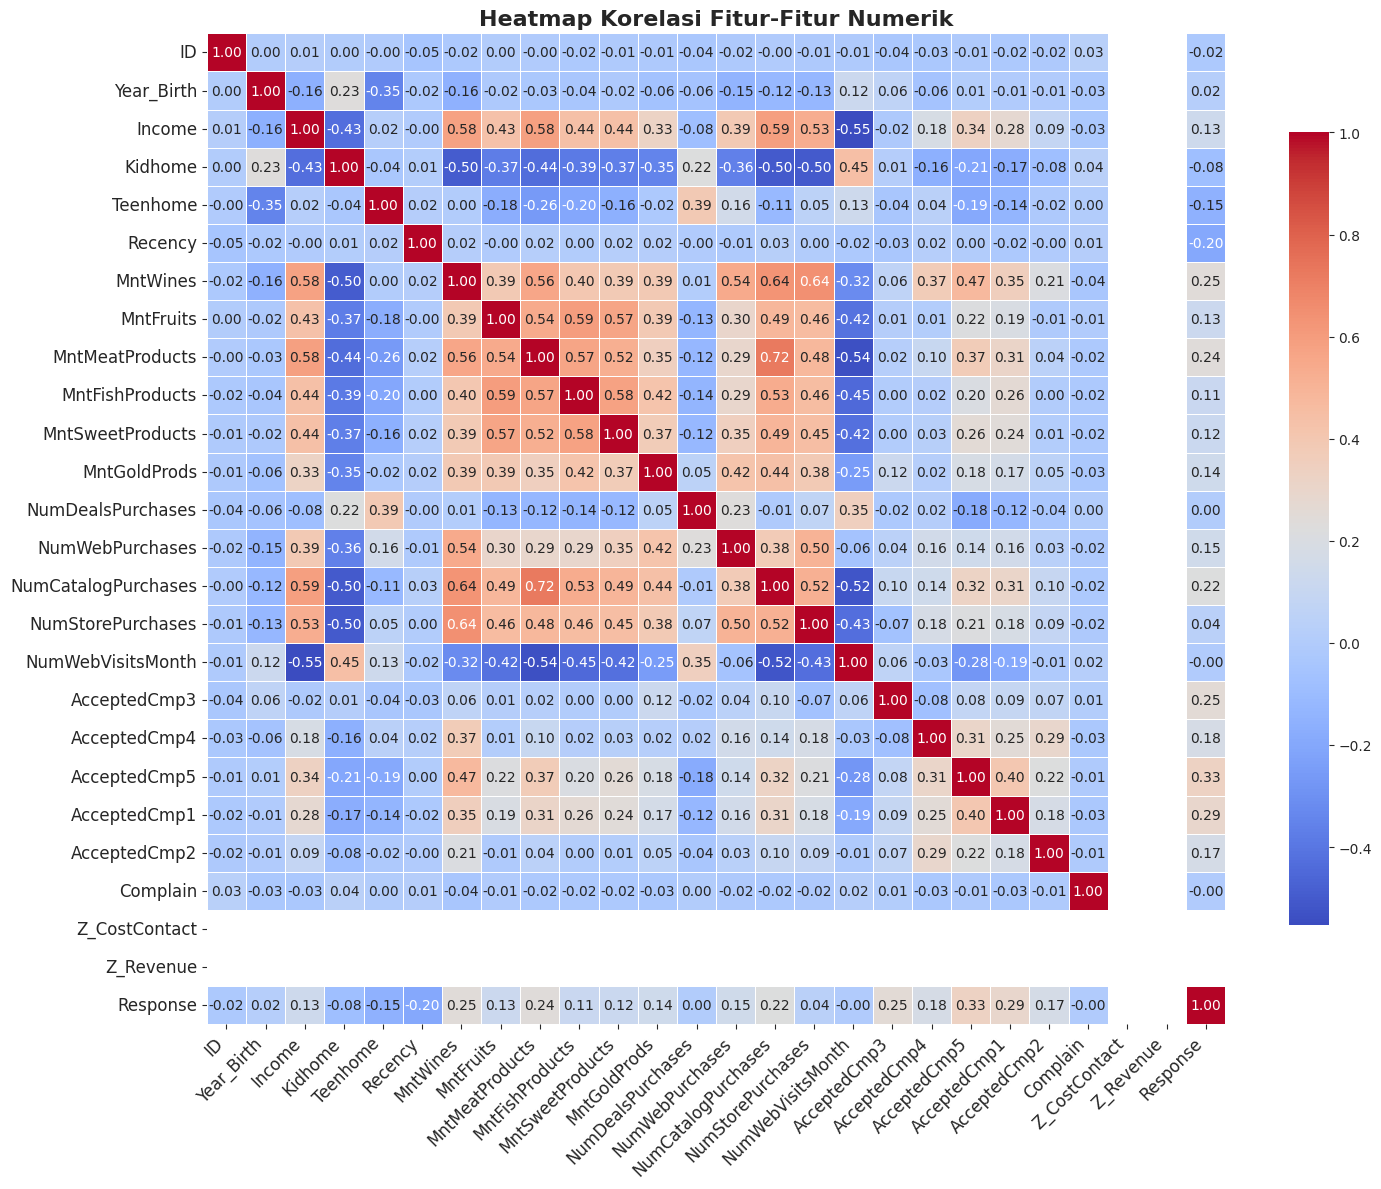

In [54]:
# Membuat Heatmap Correlation
df_num_corr = df[nums].corr()

# Menentukan ukuran figure yang lebih besar untuk tampilan lebih baik
plt.figure(figsize=(15, 12))  # Ukuran figure yang lebih besar

# Membuat heatmap dengan beberapa parameter tambahan untuk merapikan tampilannya
sns.heatmap(df_num_corr,
            annot=True,             # Menampilkan nilai korelasi pada setiap sel
            cmap='coolwarm',        # Warna dari heatmap
            linewidths=0.5,         # Lebar garis antar sel
            fmt=".2f",              # Format desimal untuk angka korelasi
            annot_kws={"size": 10}, # Ukuran font anotasi
            cbar_kws={'shrink': 0.8}) # Menyusutkan ukuran colorbar

# Rotasi label x dan y agar lebih mudah dibaca
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotasi dan ukuran font untuk label sumbu x
plt.yticks(fontsize=12)  # Ukuran font untuk label sumbu y

# Menambahkan judul untuk heatmap
plt.title('Heatmap Korelasi Fitur-Fitur Numerik', fontsize=16, weight='bold')

# Menampilkan heatmap
plt.tight_layout()  # Menyusun layout agar rapi dan tidak tumpang tindih
# Menampilkan grafik
plt.savefig("heapmap.png", dpi=720)

### Intepretasi
Feature Selection yang dilakukan oleh kelompok kami adalah dengan menghapus variabel yang dirasa tidak relevan dengan variabel target.
1. "ID" variabel ID dirasa tidak relevan dengan variabel response karena berisi data unik seluruh customer
2. "Z_CostContact" variabel ini tidak relevan dengan variabel target karena jika dilihat isinya variabel ini hanya memiliki 1 data unik yaitu "11"
3. "Z_Revenue" variabel ini sama dengan variabel "Z_CostContact" yang hanya berisi 1 data unik, bedanya variabel ini isinya "3"

# 4. Bussiness Insight

## Insight 1

In [17]:
# Buat Kolom Generasi
def generation(x):
  if x <= 1964:
    return 'Baby Boomers'
  elif x <= 1980:
    return 'Generation X'
  elif x <= 1996:
    return 'Millenials'
  else:
    return 'Generation Z'

df['generation'] = df['Year_Birth'].apply(generation)

In [18]:
# Menghitung jumlah respon tiap generasi
df_generation = df.pivot_table(index="generation",values="ID",aggfunc="count",columns="Response").reset_index()
df_generation.columns = ["generation","No","Yes"]
df_generation["Sum"] = df_generation["No"] + df_generation["Yes"]
df_generation["Percentage_Yes"] = round(df_generation["Yes"] / df_generation["Sum"] * 100,2)
df_generation

generation   No  Yes   Sum  Percentage_Yes
0  Baby Boomers  673  113   786           14.38
1  Generation X  924  145  1069           13.56
2    Millenials  309   76   385           19.74

<ipython-input-19-2f2baedb019e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_generation, x="generation", y="Percentage_Yes", palette="viridis")


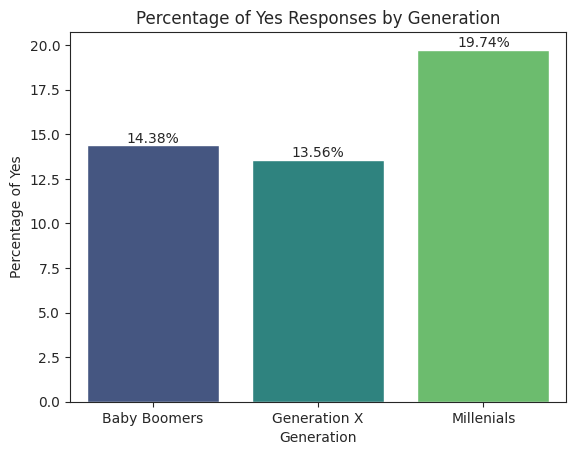

In [19]:
# Visualisasi Insight 1
ax = sns.barplot(data=df_generation, x="generation", y="Percentage_Yes", palette="viridis")
plt.title("Percentage of Yes Responses by Generation")
plt.xlabel("Generation")
plt.ylabel("Percentage of Yes")

# Add labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

### Insight 1
- Millenials memiliki presentase menerima response yang paling besar sebesar 19.74% kelompok ini menerima response. Dilanjutkan kelompok Baby Boomers dengan persentase menerima response sebesar 14.38%. Terakhir kelompok generasi x dengan presentase menerima response sebesar 13.56%, Kelompok ini juga memiliki jumlah pelanggan terbanyak, hampir 50% pelanggan berasal dari kelompok umur ini.

## Memahami Insight:

- Millennials: Merupakan kelompok yang paling responsif terhadap upaya pemasaran.
- Baby Boomers: Mengikuti di belakang Millennials dalam hal responsivitas.
- Generasi X: Jumlah pelanggan terbanyak, namun responsivitasnya sedikit di bawah Millennials dan Baby Boomers.
Rekomendasi Bisnis:

## Rekomendasi Bisnis
1. Fokus pada Millennials:
- Personalisasi: Tingkatkan personalisasi konten dan penawaran yang ditujukan kepada Millennials. Memahami minat dan preferensi mereka akan sangat membantu.
- Digital: Manfaatkan platform digital yang banyak digunakan Millennials seperti media sosial, aplikasi mobile, dan influencer marketing.
- Experiential: Tawarkan pengalaman yang unik dan berkesan. Millennials cenderung lebih menghargai pengalaman daripada produk belaka.

2. Jangan Abaikan Baby Boomers:
- Channel yang Tepat: Gunakan saluran komunikasi yang lebih tradisional seperti email, surat, atau panggilan telepon untuk menjangkau Baby Boomers.
- Relevansi: Pastikan pesan yang disampaikan relevan dengan kebutuhan dan gaya hidup mereka.
- Kemudahan: Sederhanakan proses pembelian dan layanan pelanggan untuk Baby Boomers.

3. Optimalkan Generasi X:
- Loyalitas: Bangun program loyalitas yang kuat untuk mempertahankan pelanggan setia dari Generasi X.
- Kombinasi: Padukan strategi digital dan tradisional untuk menjangkau Generasi X.
- Referral: Dorong pelanggan Generasi X untuk mereferensikan produk atau layanan kepada teman dan keluarga mereka.


## Insight 2

In [20]:
# Buat Kolom Jumlah Anak
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

In [21]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-02-10       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0             0             0         0              3         11         1   
1             0             0         0              3         11         0   
2             0             0         0              3         11         0   
3             0             0         0              3         11         0   
4             0             0         0              3         11         0   

     generation  Total_Children  
0  Baby Boomers               0  
1  Baby Boomers               2  
2  Generation X               0  
3    Millenials               1  
4    Millenials               1  

[5 rows x 31 columns]

In [22]:
# Hitung Presentase Response Berdasarkan Total Children
df_children = df.pivot_table(index="Total_Children",values="ID",aggfunc="count",columns="Response").reset_index()
df_children.columns = ["Total_Children","No","Yes"]
df_children["Sum"] = df_children["No"] + df_children["Yes"]
df_children["Percentage_Yes"] = round(df_children["Yes"] / df_children["Sum"] * 100,2)
df_children

Total_Children    No  Yes   Sum  Percentage_Yes
0               0   469  169   638           26.49
1               1  1012  116  1128           10.28
2               2   374   47   421           11.16
3               3    51    2    53            3.77

<ipython-input-23-22a0bf60735c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_children, x="Total_Children", y="Percentage_Yes", palette="viridis")


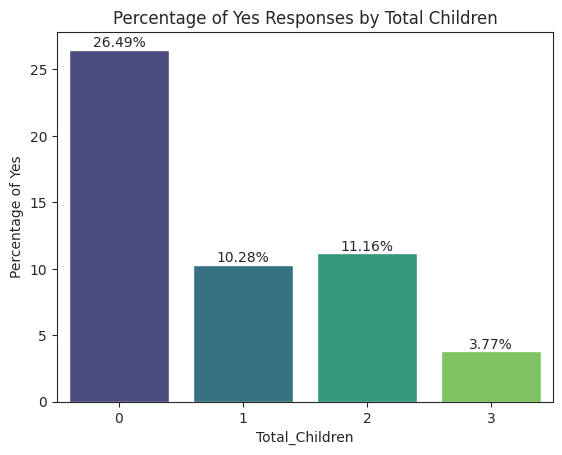

In [23]:
# Visualisasi Insight 2
ax = sns.barplot(data=df_children, x="Total_Children", y="Percentage_Yes", palette="viridis")
plt.title("Percentage of Yes Responses by Total Children")
plt.xlabel("Total_Children")
plt.ylabel("Percentage of Yes")

# Add labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

## Insight 2
- Pelanggan paling banyak merespon campaign pada kelompok pelanggan tanpa anak (Total_Children = 0). Pelanggan terbanyak terdapat pada pelanggan dengan 1 anak namun respon terhadap campaign hanya sebesar 10.28%.
- Hal ini cukup aneh seharusnya pelanggan dengan anak bisa lebih banyak dikonversi karena kebutuhan dalam rumah tangga mereka lebih banyak.

## Rekomendasi
1. Segmentasi Lebih Lanjut:
- Usia Anak: Bagi kelompok dengan 1 anak menjadi sub-kelompok berdasarkan usia anak. Kebutuhan dan preferensi akan berbeda antara keluarga dengan bayi dan keluarga dengan anak usia sekolah.
- Pendapatan: Bagi kelompok berdasarkan tingkat pendapatan. Keluarga dengan 1 anak dengan pendapatan tinggi mungkin memiliki perilaku konsumsi yang berbeda dengan keluarga dengan pendapatan menengah.
2. Personalisasi Pesan:
- Sesuaikan Pesan: Sesuaikan pesan kampanye dengan kebutuhan spesifik setiap segmen. Misalnya, untuk keluarga dengan bayi, fokus pada produk yang berkaitan dengan bayi, seperti perlengkapan bayi atau makanan bayi.
- Tawarkan Solusi: Tawarkan solusi yang relevan dengan masalah yang dihadapi oleh setiap segmen. Misalnya, jika banyak keluarga dengan 1 anak yang khawatir tentang pendidikan anak, tawarkan produk atau layanan yang berkaitan dengan pendidikan.
3. Optimalkan Saluran Komunikasi:
- Analisis Perilaku: Analisis perilaku online dan offline dari setiap segmen untuk memahami saluran komunikasi yang paling efektif.
Influencer Marketing: Gunakan influencer yang relevan dengan setiap segmen untuk mempromosikan produk atau layanan.

## Insight 3


In [24]:
# Fungsi segmentasi Income
def income_category(income):
  if income <= df['Income'].quantile(0.33):
    return 'Low'
  elif income <= df['Income'].quantile(0.66):
    return 'Medium'
  else:
    return 'High'

# Apply the function
df['Income_Category'] = df['Income'].apply(income_category)

# Print the updated dataframe to verify the new column
df.head()


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  AcceptedCmp1  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-02-10       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response    generation  \
0             0         0              3         11         1  Baby Boomers   
1             0         0              3         11         0  Baby Boomers   
2             0         0              3         11         0  Generation X   
3             0         0              3         11         0    Millenials   
4             0         0              3         11         0    Millenials   

   Total_Children  Income_Category  
0               0           Medium  
1               2           Medium  
2               0             High  
3               1              Low  
4               1           Medium  

[5 rows x 32 columns]

In [25]:
# Hitung Presentase respon yes terhadap income
df_income = df.pivot_table(index="Income_Category",values="ID",aggfunc="count",columns="Response").reset_index()
df_income.columns = ["Income_Category","No","Yes"]
df_income["Sum"] = df_income["No"] + df_income["Yes"]
df_income["Percentage_Yes"] = round(df_income["Yes"] / df_income["Sum"] * 100,2)
df_income

Income_Category   No  Yes  Sum  Percentage_Yes
0            High  603  175  778           22.49
1             Low  646   85  731           11.63
2          Medium  657   74  731           10.12

<ipython-input-26-2d64aead8b51>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_income, x="Income_Category", y="Percentage_Yes", palette="viridis")


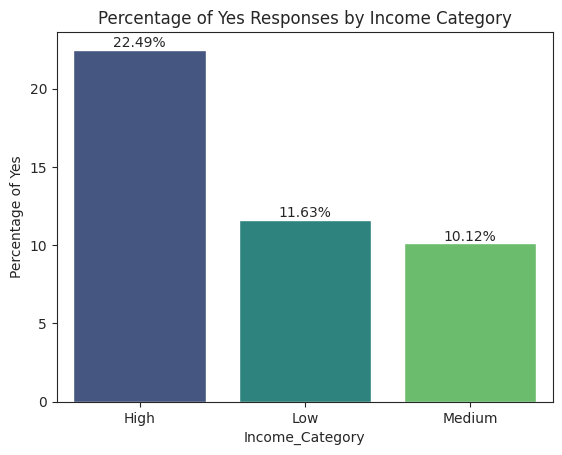

In [26]:
# Visualisasi Insight 3
ax = sns.barplot(data=df_income, x="Income_Category", y="Percentage_Yes", palette="viridis")
plt.title("Percentage of Yes Responses by Income Category")
plt.xlabel("Income_Category")
plt.ylabel("Percentage of Yes")
# Add labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

## Insight 3
- Pelanggan dengan kelompok income high memiliki presentase menerima response yang paling besar yaitu sebesar 22.49%. Hal ini wajar karena tentu saja pelanggan dengan income yang lebih besar memiliki buying power yang lebih besar sehingga kemungkinan konversi lebih besar apabila campaign sesuai kebutuhan mereka.
- Terdapat kejanggalan kelompok dengan income low memiliki daya konversi yang lebih tinggi dibandingkan kelompok pelanggan dengan income medium.
- Karena pengelompokan data berdasarkan quantile maka jumlah pelanggan tiap kelompok income tidak berbeda jauh.

## Kemungkinan Alasan

Beberapa faktor yang mungkin menyebabkan perbedaan ini antara lain:

- Relevansi Produk: Produk atau layanan yang ditawarkan mungkin lebih relevan dengan kebutuhan sehari-hari kelompok berpendapatan rendah. Misalnya, produk dengan harga yang lebih terjangkau atau produk yang menawarkan solusi untuk masalah yang sering dihadapi oleh kelompok ini.
- Pesan Kampanye: Pesan kampanye yang digunakan mungkin lebih efektif dalam menarik minat kelompok berpendapatan rendah. Pesan yang menekankan nilai tambah, manfaat jangka panjang, atau kemudahan pembayaran mungkin lebih resonan dengan kelompok ini.
- Kompetisi: Persaingan di segmen pasar berpendapatan menengah mungkin lebih ketat, sehingga lebih sulit untuk menarik perhatian konsumen.
- Faktor Psikologis: Konsumen dengan pendapatan rendah mungkin lebih termotivasi untuk mencari penawaran yang menguntungkan atau produk yang dapat meningkatkan kualitas hidup mereka.

## Rekomendasi
1. Sesuaikan Pesan: Sesuaikan pesan kampanye dengan kebutuhan dan minat masing-masing segmen. Gunakan bahasa yang lebih sederhana dan mudah dipahami untuk kelompok berpendapatan rendah.
2. Tawarkan Solusi: Tawarkan solusi yang relevan dengan masalah yang dihadapi oleh setiap segmen. Misalnya, untuk kelompok berpendapatan rendah, fokus pada produk yang menawarkan nilai tambah dan hemat biaya.
3.  Analisa perilaku kompetitor apakah benar terdapat kompetisi yang ketat pada kelompok income menengah.


## Insight 4


In [27]:
# Membuat kolom total jumlah pembelian pelanggan
df['sum_of_amount'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [28]:
df['SoA_Cat'] = np.where(df['sum_of_amount']<=396.000000,'low',
                        np.where(df['sum_of_amount']<=1046.000000,'medium','high'))
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp2  Complain  Z_CostContact  \
0  2012-09-04       58       635  ...             0         0              3   
1  2014-03-08       38        11  ...             0         0              3   
2  2013-08-21       26       426  ...             0         0              3   
3  2014-02-10       26        11  ...             0         0              3   
4  2014-01-19       94       173  ...             0         0              3   

   Z_Revenue  Response    generation  Total_Children  Income_Category  \
0         11         1  Baby Boomers               0           Medium   
1         11         0  Baby Boomers               2           Medium   
2         11         0  Generation X               0             High   
3         11         0    Millenials               1              Low   
4         11         0    Millenials               1           Medium   

   sum_of_amount  SoA_Cat  
0           1617     high  
1             27      low  
2            776   medium  
3             53      low  
4            422   medium  

[5 rows x 34 columns]

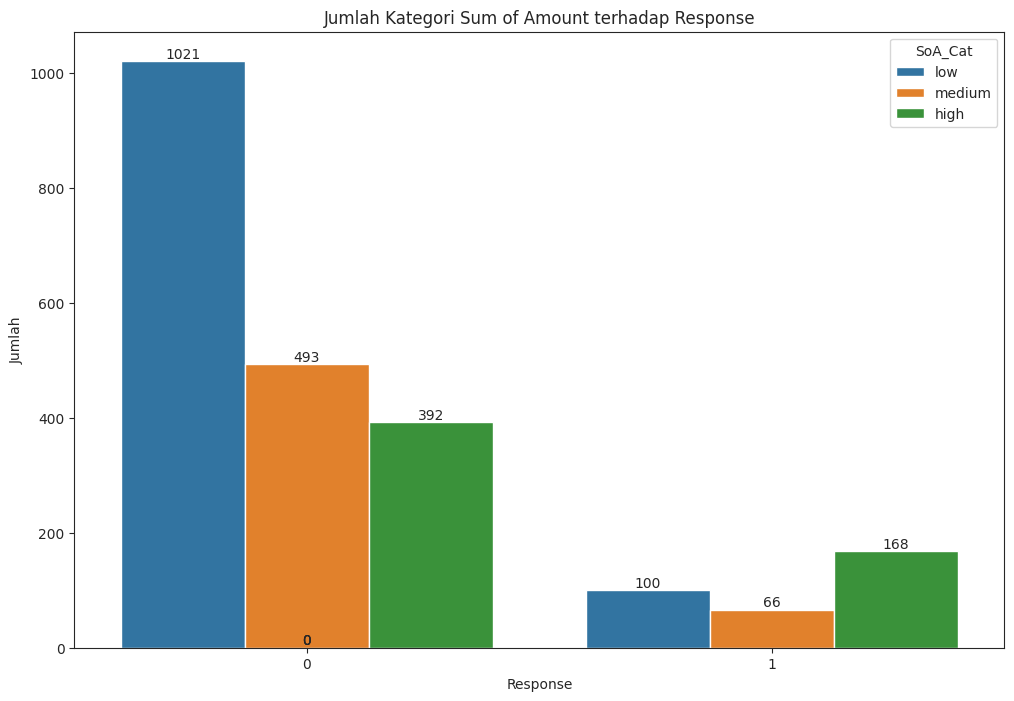

In [30]:
# Visualisasi Insight
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='Response', hue='SoA_Cat')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.title('Jumlah Kategori Sum of Amount terhadap Response')
plt.xlabel('Response')
plt.ylabel('Jumlah')
plt.legend(title='SoA_Cat')
plt.show()

## Insight 4
Sum of Amount adalah variabel yang menjelaskan bahwa sudah berapa banyak customer membeli barang dari seluruh produk/kategori. Kemudian variabel tersebut dibagi lagi menjadi 3 kelompok untuk kategori Low, Medium, dan High. Grafik diatas menunjukkan bahwa semakin banyak customer tersebut berbelanja maka semakin tinggi pula customer memberikan response terhadap campaign yang dilakukan. Dapat dilihat bahwa ada sekitar 168 atau sekitar 7.5% customer yang merespons terhadap campaign yang dilakukan, selanjutnya diikuti oleh kelompok customer low dengan 100 atau sekitar 4.46% customer dan medium dengan 66 atau sekitar 2.95% customer.

## Rekomendasi
1. Faktor pemengaruh : Evaluasi faktor-faktor yang memengaruhi banyaknya pembelian customer, apakah income, jumlah anak, umur, dll.
2. Melakukan personalisasi campaign : Setelah mengetahui faktor-faktor apa saja yang memengaruhi banyaknya pembelian. Buatlah segmentasi pelanggan, misalnya umur 40 an, memiliki anak, income menengah. Lalu buatlah campaign yang sesuai dengan masalah dan kebutuhan segmen ini.

## Inisght 5


In [38]:
# Menghitung presentase menerima campaign terhadap banyaknya jumlah campaign yang telah diterima sebelumnya
df["total_acc"] = df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2']
df_acc = df.pivot_table(index="total_acc",values="ID",aggfunc="count",columns="Response").reset_index()
df_acc.columns = ["total_acc","No","Yes"]
df_acc["Sum"] = df_acc["No"] + df_acc["Yes"]
df_acc["Percentage_Yes"] = round(df_acc["Yes"] / df_acc["Sum"] * 100,2)
df_acc

total_acc    No  Yes   Sum  Percentage_Yes
0          0  1631  146  1777            8.22
1          1   224  101   325           31.08
2          2    41   42    83           50.60
3          3     9   35    44           79.55
4          4     1   10    11           90.91

<ipython-input-39-9452c5f2d4de>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_acc, x="total_acc", y="Percentage_Yes", palette="viridis")


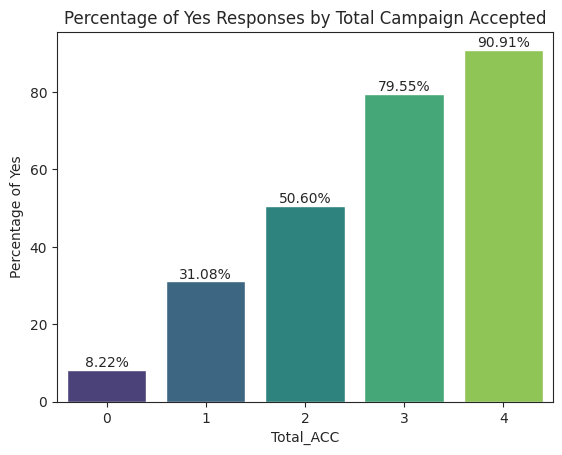

In [39]:
# Visualisasi Insight 3
ax = sns.barplot(data=df_acc, x="total_acc", y="Percentage_Yes", palette="viridis")
plt.title("Percentage of Yes Responses by Total Campaign Accepted")
plt.xlabel("Total_ACC")
plt.ylabel("Percentage of Yes")
# Add labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

## Insight 5
- Grafik di atas menunjukkan bahwa semakin banyak pelanggan menerima campaign sebelumnya maka akan semakin besar kemungkinannya untuk merespon campaign terbaru. Dapat dilihat pada grafik presentase penerimaan response terus meningkat dari 0 hingga 4.

- Walaupun kelompok pelanggan dengan historis 4 kali penerimaan campaign memeiliki presentase penerimaan response yang sangat besar, kelompok pelanggan ini sangatlah kecil.
- Kelompok pelanggan terbesar adalah pelanggan dengan historis 0 penerimaan campaign yaitu sekitar 79% pelanggan berada dalam kelompok ini. Kelompok ini hanya memiliki presentase penerimaan campaign sebesar 8.22%. Perlu usaha lebih lanjut agar dapat mengkonversi kelompok ini lebih banyak.

## Rekomendasi
1. Segmentasi: Bagi pelanggan menjadi segmen yang lebih kecil berdasarkan jumlah kampanye yang diterima, minat, dan perilaku pembelian. Ini akan memungkinkan Anda untuk mengirimkan pesan yang lebih relevan dan personal.
2. Rekomendasi Produk: Gunakan data historis untuk memberikan rekomendasi produk yang lebih relevan. Semakin sering pelanggan berinteraksi dengan kampanye, semakin baik algoritma Anda dalam memprediksi preferensi mereka.
3. Urutan Pesan: Rancang urutan kampanye yang efektif. Kampanye awal sebaiknya fokus pada membangun kesadaran merek dan membangun hubungan dengan pelanggan. Kampanye selanjutnya dapat lebih fokus pada penawaran produk dan promosi.